## Libraries

In [1]:
import cv2
import numpy as np
import readthermal as rd
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap

## Reading Thermal Images stored on the System and Converting them to Images with temperature in degrees celsius at each pixel location and storing them in a numpy Array

In [2]:
shape=(480,640)
# shape=(640,480)
count=95 # number of images

np_img=np.zeros((shape[0],shape[1],count), dtype=complex)

for i in range(1,count+1):
    img=rd.extract_thermal(str(i)+".jpg")
    for j in range(0,shape[0]):
        for k in range(0,shape[1]):
            np_img[j][k][i-1]=img[j][k]

## Printing Dimension of numpy Array

In [3]:
print(np_img.shape)

(480, 640, 95)


## Calculation of Phase to multipled to Fourier Coefficients of times series value of same pixel in Thermogram (Thermal Image)

In [4]:
z=0.002
k=0.33
c=3780
p=1057
X=k/(c*p)
f=0.01 # Endothelial
# f=0.03 # Neurogenic
# f=0.07 # Myogenic

phase=np.exp(z*np.sqrt(np.pi*f/X)*(1+1j))

## Printing Phase

In [5]:
print(phase)

(1.1362276288627418+3.2396754954446267j)


## Calculation of Blood Flow from pixel values of series of Thermograms

In [6]:
for i in range(0,shape[0]):
    for j in range(0,shape[1]):
        np_img[i][j]=np.fft.fft(np_img[i][j])*phase

for i in range(0,shape[0]):
    for j in range(0,shape[1]):
        np_img[i][j]=np.real(np.fft.ifft(np_img[i][j])) # storing only real component of complex number

## Printing Blood Flow Values

In [7]:
# print(np_img)

## Seperation Blood Flow values and Normalisation of each frame and apllying color map and Writing to System

/home/svradityareddy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


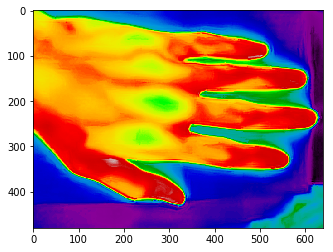

In [8]:
cmap = get_cmap('nipy_spectral')

frame_array=[]

for i in range(0,count):
    img=np.zeros((shape[0],shape[1]))
    for j in range(0,shape[0]):
        for k in range(0,shape[1]):
            img[j][k]=np_img[j][k][i]
    img=img/np.amax(img)
    im = plt.imshow(img,cmap=cmap) 
    plt.savefig("out"+str(i)+".jpg")
    frame_array.append(img)

## Generating Blood Flow Video from Blood Flow Images

In [9]:
fps=2
out=cv2.VideoWriter("s_bldf"+".avi",cv2.VideoWriter_fourcc(*'XVID'),fps,(432,288))

for i in range(count):
    img=cv2.imread("out"+str(i)+".jpg")
    out.write(img)

out.release()

## Printing length of Frame Array

In [10]:
print(len(frame_array))

95
